In [76]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')


### **Step-1  Dataset Understanding**

In [45]:
df = pd.read_csv("Crude_oil.csv")

In [46]:
df.shape

(2548, 6)

In [47]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2548 non-null   object 
 1   Close/Last  2548 non-null   float64
 2   Volume      2517 non-null   float64
 3   Open        2548 non-null   float64
 4   High        2548 non-null   float64
 5   Low         2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [49]:
df.isna().sum()

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [50]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [51]:
df.duplicated().sum()

np.int64(0)

### **Step-2 Preprocessing**


In [ ]:
# Step-2.1 --> Converting 'Date' column to datetime format and setting it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-10-30,85.68,NaN,85.68,85.68,85.68
2012-10-31,86.24,192354.0,85.73,87.19,85.61
2012-11-01,87.09,185097.0,86.10,87.42,85.92
2012-11-02,84.86,273619.0,86.91,87.24,84.66
2012-11-05,85.65,185846.0,84.65,85.90,84.34


In [53]:
df.isnull().sum()

Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [ ]:
# Step-2.2 --> Handling Missing Values
# using forward fill method to fill the missing values and also renaming column for consistency (Close/Last) As Close
df.rename(columns={'Close/Last': 'Close'}, inplace=True)
df['Volume'] = df['Volume'].ffill().bfill()
# df.isnull().sum()

Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

### **Step 3: Exploratory Data Analysis (EDA)**

In [64]:
# Step-3.1 Basic Numerical summary
# .T flips rows ↔ columns.

df[['Open', 'High', 'Low', 'Close', 'Volume']].describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2548.0,66.042500,22.710749,-37.25,48.6650,59.770,87.4500,124.58
High,2548.0,66.959839,22.820487,-35.20,49.3175,60.545,88.6950,129.44
Low,2548.0,65.065043,22.565127,-40.32,47.8000,58.850,86.3425,120.79
Close,2548.0,66.043740,22.732093,-37.63,48.6200,59.720,87.4675,123.70
Volume,2548.0,392403.096154,235066.581496,153.00,220238.5000,360841.000,555833.5000,1693652.00


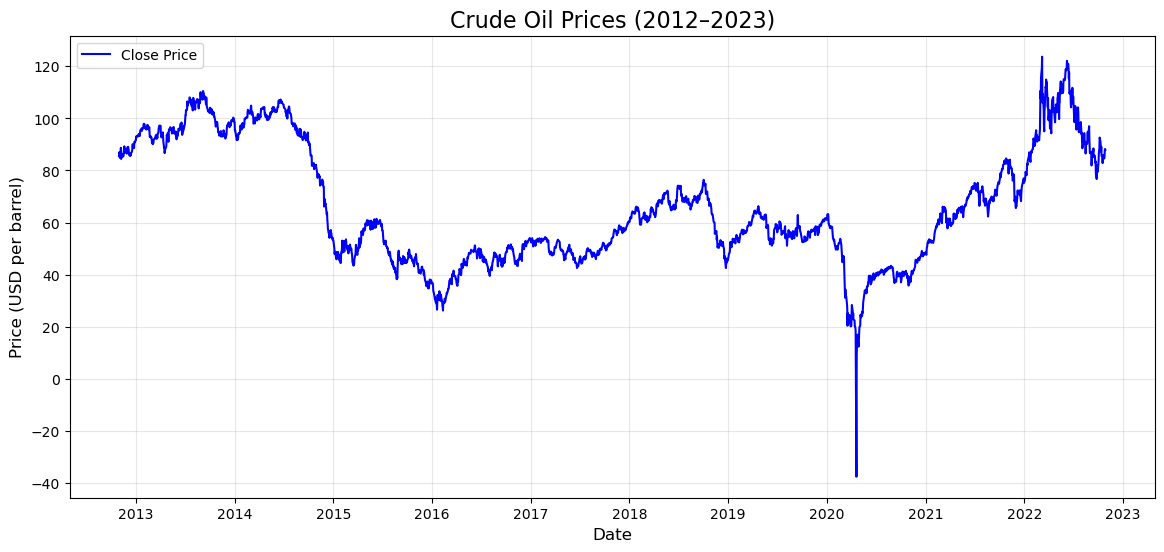

In [66]:
# Step-3.2 time series plot for 'Close' price over time

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], color='blue', linewidth=1.5, label='Close Price')
plt.title('Crude Oil Prices (2012–2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

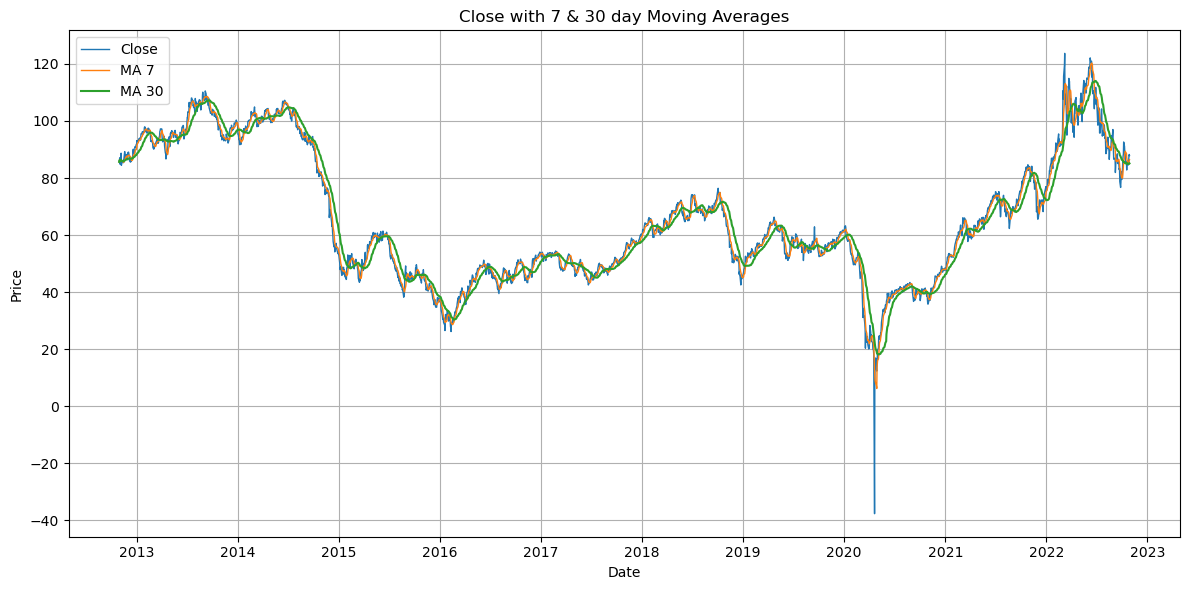

In [ ]:
# Step 3.3 — Moving averages (7 & 30 days)

df['MA7'] = df['Close'].rolling(window=7, min_periods=1).mean()
df['MA30'] = df['Close'].rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close', linewidth=1)
plt.plot(df['MA7'], label='MA 7', linewidth=1)
plt.plot(df['MA30'], label='MA 30', linewidth=1.5)
plt.title('Close with 7 & 30 day Moving Averages')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

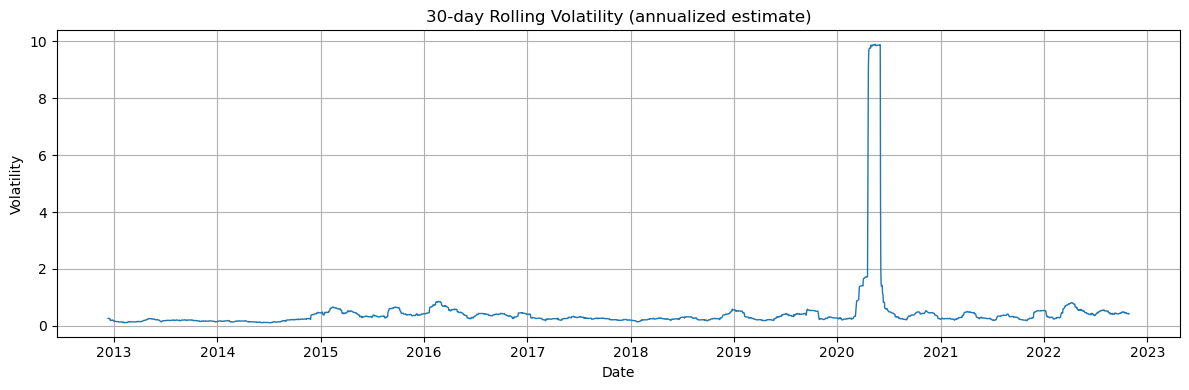

In [72]:
# Step 3.4 — Returns and rolling volatility
df['Return'] = df['Close'].pct_change()
df['Volatility30'] = df['Return'].rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(12,4))
plt.plot(df['Volatility30'], linewidth=1)
plt.title('30-day Rolling Volatility (annualized estimate)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()


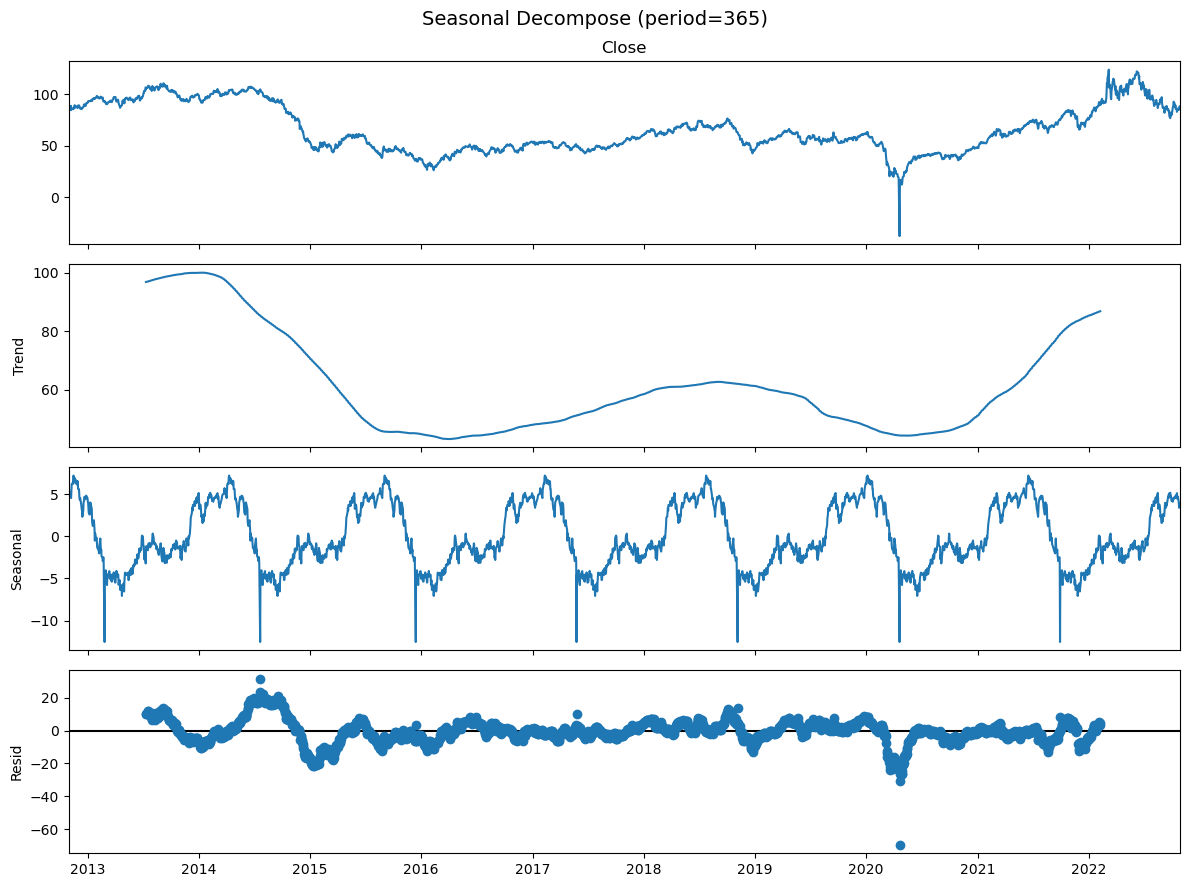

In [74]:
# Step 3.5 — Seasonal decomposition

period = 365  
try:
    decomposition = seasonal_decompose(df['Close'].dropna(), model='additive', period=period)
    fig = decomposition.plot()
    fig.set_size_inches(12,9)
    plt.suptitle(f'Seasonal Decompose (period={period})', fontsize=14)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Seasonal decomposition failed:", e)
    print("Try a smaller period (e.g., 252) or check data frequency.")

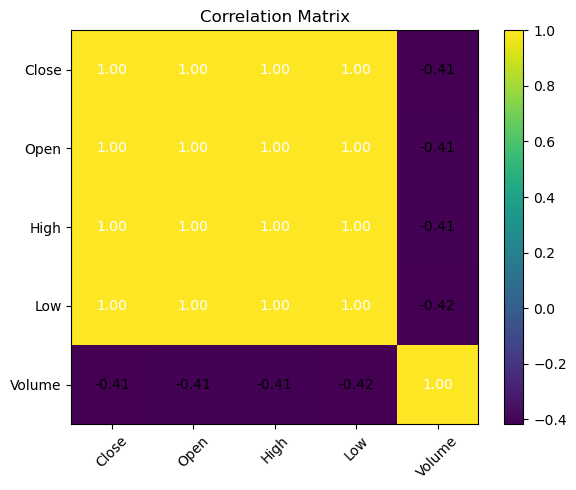

In [75]:

# Step 3.6 — Correlation matrix

num_cols = ['Close','Open','High','Low','Volume']
corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
for (i,j), val in np.ndenumerate(corr.values):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', 
             color='white' if abs(val) > 0.5 else 'black', fontsize=10)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [79]:
# Step 3.7 — ADF test on Close

adf_res = adfuller(df['Close'].dropna())
print("\nAugmented Dickey-Fuller test on Close:")
print("ADF Statistic: %.4f" % adf_res[0])
print("p-value: %.4f" % adf_res[1])
for key, val in adf_res[4].items():
    print(f"Critical Value ({key}): {val:.4f}")



Augmented Dickey-Fuller test on Close:
ADF Statistic: -1.8220
p-value: 0.3696
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674


In [81]:
# Step 3.8 — Outliers (IQR method)


q1 = df['Close'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

print("\nOutliers detected (IQR method):", len(outliers))
display(outliers.head())



Outliers detected (IQR method): 1


,Close,Volume,Open,High,Low,MA7,MA30,Return,Volatility30
Date,,,,,,,,,
2020-04-20,-37.63,148427.0,-37.25,-35.2,-40.32,12.22,22.540667,-3.059661,8.969487


In [ ]:
# Step 3.9 — Top / Bottom Close prices

print("\nTop 5 Highest Close prices:")
display(df['Close'].nlargest(5))

print("\nTop 5 Lowest Close prices:")
display(df['Close'].nsmallest(5))



Top 5 Highest Close prices:


Date
2022-03-08    123.70
2022-06-08    122.11
2022-06-09    121.51
2022-06-13    120.93
2022-06-10    120.67
Name: Close, dtype: float64


Top 5 Lowest Close prices:


Date
2020-04-20   -37.63
2020-04-21     9.06
2020-04-28    12.34
2020-04-27    12.78
2020-04-22    13.78
Name: Close, dtype: float64

### **Step 4 :Feature engineering**


In [ ]:
for lag in [1,2,3,7,14]:
    df[f'lag_{lag}'] = df['Close'].shift(lag)

df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

display(df.head(10))


,Close,Volume,Open,High,Low,MA7,MA30,Return,Volatility30,lag_1,lag_2,lag_3,lag_7,lag_14,day_of_week,month,year
Date,,,,,,,,,,,,,,,,,
2012-10-30,85.68,192354.0,85.68,85.68,85.68,85.680000,85.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10,2012
2012-10-31,86.24,192354.0,85.73,87.19,85.61,85.960000,85.960000,0.006536,NaN,85.68,NaN,NaN,NaN,NaN,2,10,2012
2012-11-01,87.09,185097.0,86.10,87.42,85.92,86.336667,86.336667,0.009856,NaN,86.24,85.68,NaN,NaN,NaN,3,11,2012
2012-11-02,84.86,273619.0,86.91,87.24,84.66,85.967500,85.967500,-0.025606,NaN,87.09,86.24,85.68,NaN,NaN,4,11,2012
2012-11-05,85.65,185846.0,84.65,85.90,84.34,85.904000,85.904000,0.009309,NaN,84.86,87.09,86.24,NaN,NaN,0,11,2012
2012-11-06,88.71,270163.0,85.67,89.22,85.42,86.371667,86.371667,0.035727,NaN,85.65,84.86,87.09,NaN,NaN,1,11,2012
2012-11-07,84.44,382231.0,88.42,88.80,84.05,86.095714,86.095714,-0.048134,NaN,88.71,85.65,84.86,NaN,NaN,2,11,2012
2012-11-08,85.09,265354.0,84.52,85.70,84.22,86.011429,85.970000,0.007698,NaN,84.44,88.71,85.65,85.68,NaN,3,11,2012
2012-11-09,86.07,277623.0,85.00,86.77,84.13,85.987143,85.981111,0.011517,NaN,85.09,84.44,88.71,86.24,NaN,4,11,2012
